Homography Matrix:
[[ 6.18592695e-02  1.37310139e-01 -3.36403400e+02]
 [-1.06806599e-01 -9.98784536e-01  3.43237665e+02]
 [ 5.38227144e-05 -2.80223703e-03  1.00000000e+00]]


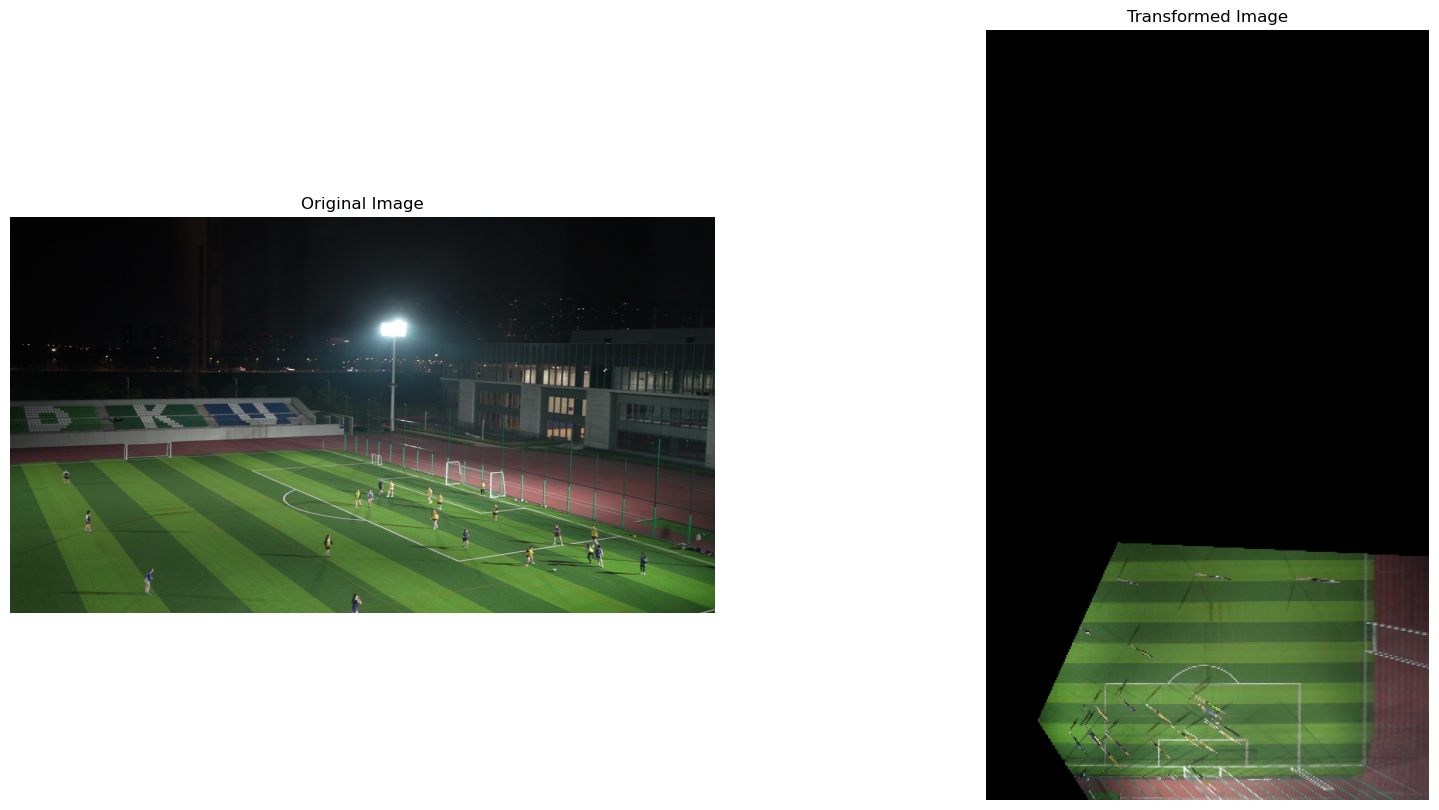

In [18]:
import json
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load keypoints from JSON files
with open('trainingW.json', 'r') as f:
    vocational_keypoints = json.load(f)

with open('map_keypoints.json', 'r') as f:
    map_keypoints = json.load(f)

# Filter out keypoints that are not visible
image_points = []
map_points = []

for key in vocational_keypoints:
    if vocational_keypoints[key] and map_keypoints[key]:  # Ensure both keypoints are visible
        image_points.append(vocational_keypoints[key])
        map_points.append(map_keypoints[key])

# Convert to NumPy arrays
image_points = np.array(image_points, dtype=np.float32)
map_points = np.array(map_points, dtype=np.float32)


# Load the base map image
map_image_path = 'map.jpg'
base_map = cv2.imread(map_image_path)
if base_map is None:
    raise Exception(f"Map image {map_image_path} could not be loaded.")

height_of_map, width_of_map, _ = base_map.shape

# Calculate the homography matrix
H, status = cv2.findHomography(image_points, map_points, cv2.RANSAC, 5.0)
print("Homography Matrix:")
print(H)

directory = "test"
filename = "6.jpg"

filepath = os.path.join(directory, filename)
image = cv2.imread(filepath)

# Apply the perspective transformation
transformed_image = cv2.warpPerspective(image, H, (width_of_map, height_of_map))

# Convert images from BGR to RGB
transformed_image_rgb = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set the figure size in inches (width, height)
plt.figure(figsize=(20, 10))  # Increase width to accommodate both images side by side

# Display the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')  # Hide the axes

# Display the transformed image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(transformed_image_rgb)
plt.title('Transformed Image')
plt.axis('off')  # Hide the axes

# Save the figure
plt.savefig("homography.png", dpi=300, format='png', bbox_inches='tight', pad_inches=0.1)
# 'dpi=300' sets a high dots-per-inch (resolution)
# 'format=png' specifies the file format to use; PNG is lossless
# 'bbox_inches' and 'pad_inches' control the borders and padding around the saved figure

plt.show()
